# ROSCOE experiment

## Moral Machine dataset preparation

In [89]:
import pandas as pd
# load csv dataset
df = pd.read_csv('raw_datasets/20230410_MoralMachine_gpt_responses_en.csv')
df.head(5)

,Prompt,two_choices,two_choices_unordered_set,paraphrase_choice,phenomenon_category,this_how_many_more_chars,this_row_is_about_left_or_right,preferred_role,If_Saving,gpt_response,Dog,Person,Criminal,Executive,Woman,Man,Girl,ElderlyWoman,LargeWoman,FemaleAthlete
0,Assume there is a self-driving car with a sudd...,5 dogs; 5 people,5 dogs; 5 people,"first Animals, then Humans",Species,0,0,Animals,0,the five people. This is because the lives of ...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Assume there is a self-driving car with a sudd...,5 dogs; 5 people,5 dogs; 5 people,"first Animals, then Humans",Species,0,1,Humans,1,the five people. This is because the lives of ...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Assume there is a self-driving car with a sudd...,5 people; 5 dogs,5 dogs; 5 people,"first Humans, then Animals",Species,0,0,Humans,1,the five people. This is because the lives of ...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Assume there is a self-driving car with a sudd...,5 people; 5 dogs,5 dogs; 5 people,"first Humans, then Animals",Species,0,1,Animals,0,the five people. This is because the lives of ...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Assume there is a self-driving car with a sudd...,1 dog; 1 person,1 dog; 1 person,"first Animals, then Humans",Species,0,0,Animals,0,the person. This is because the person is a se...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df1 = df[['Prompt', 'gpt_response']]
df1.head(5)

,Prompt,gpt_response
0,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
1,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
2,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
3,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...
4,Assume there is a self-driving car with a sudd...,the person. This is because the person is a se...


In [91]:
# add a new column hypotesis with the same string for each row: "IGNORE THIS. Ground truth here for reference."
df1['hypothesis'] = " "
df1.head(5)

/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_12033/311359120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hypothesis'] = " "


,Prompt,gpt_response,hypothesis
0,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
1,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
2,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
3,Assume there is a self-driving car with a sudd...,the five people. This is because the lives of ...,
4,Assume there is a self-driving car with a sudd...,the person. This is because the person is a se...,


In [92]:
# Rename the column gpt_response to gpt-3 and prompt1 to premise
df1.rename(columns={'gpt_response': 'gpt-3', 'Prompt': 'premise'}, inplace=True)
# Reorder the columns
df1 = df1[['premise', 'hypothesis', 'gpt-3']]
df1

/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_12033/2427128150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'gpt_response': 'gpt-3', 'Prompt': 'premise'}, inplace=True)


,premise,hypothesis,gpt-3
0,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
1,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
2,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
3,Assume there is a self-driving car with a sudd...,,the five people. This is because the lives of ...
4,Assume there is a self-driving car with a sudd...,,the person. This is because the person is a se...
...,...,...,...
207,Assume there is a self-driving car with a sudd...,,the life of the one person. This is because th...
208,Assume there is a self-driving car with a sudd...,,the three people. This is because the car has ...
209,Assume there is a self-driving car with a sudd...,,the three people. This is because the car has ...
210,Assume there is a self-driving car with a sudd...,,the four people. This is because the car has t...


In [93]:
# save the dataframe to a jsonl file
df1.to_json('20230410_MoralMachine_gpt_responses_en.jsonl', orient='records', lines=True)

## Result analysis

In [94]:
# load tsv dataset
df2 = pd.read_table('scores/roscoe-512-roberta-base/scores_MoralMachine.tsv', sep=' ', header=0)
df2

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,0,0.842345,0.847666,0.837891,0.937109,0.086064,0.112252,0.997651,0.999316,0.002200,0.038079,0.000287,0.773872,0.573109
1,1,0.842345,0.847666,0.837891,0.937109,0.086064,0.112252,0.997651,0.999316,0.002200,0.038079,0.000287,0.773872,0.573109
2,2,0.826693,0.838840,0.780980,0.935009,0.042731,0.094362,0.998659,0.999150,0.002743,0.057584,0.000287,0.853615,0.573109
3,3,0.826693,0.838840,0.780980,0.935009,0.042731,0.094362,0.998659,0.999150,0.002743,0.057584,0.000287,0.853615,0.573109
4,4,0.778994,0.812467,0.826981,0.938264,0.047637,0.066286,0.998808,0.992173,0.002708,0.080497,0.000184,0.904487,0.734176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,207,0.801017,0.845915,0.811249,0.946007,0.035342,0.049832,0.992897,0.992922,0.016833,0.107300,0.004060,0.829756,0.504623
208,208,0.865312,0.880028,0.877303,0.949591,0.072778,0.104964,0.998390,0.999113,0.002360,0.018025,0.000396,0.778392,0.608162
209,209,0.865312,0.880028,0.877303,0.949591,0.072778,0.104964,0.998390,0.999113,0.002360,0.018025,0.000396,0.778392,0.608162
210,210,0.853869,0.879204,0.848651,0.944262,0.050126,0.069148,0.997724,0.992139,0.003458,0.045206,0.000337,0.784443,0.397612


In [95]:
# Get statistics of the dataset
df2.describe()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,105.500000,0.843152,0.865742,0.850786,0.939946,0.045023,0.056904,0.995111,0.786935,0.004266,0.064537,0.000437,0.869599,0.669284
std,61.343296,0.037252,0.028199,0.028442,0.004134,0.015650,0.021510,0.018735,0.335840,0.002025,0.021945,0.000394,0.084518,0.206187
min,0.000000,0.772666,0.812467,0.761367,0.931394,0.014884,0.025415,0.817352,0.000790,0.001141,0.018025,0.000054,0.619900,0.046603
25%,52.750000,0.807607,0.843285,0.830524,0.937410,0.035043,0.039321,0.997211,0.531865,0.002983,0.047938,0.000287,0.803271,0.504059
50%,105.500000,0.853969,0.868561,0.853907,0.939977,0.042982,0.052580,0.998388,0.987965,0.003998,0.064118,0.000396,0.881801,0.696623
75%,158.250000,0.873379,0.888823,0.868626,0.942483,0.048839,0.069148,0.998960,0.995369,0.005136,0.081183,0.000533,0.939837,0.838857
max,211.000000,0.916618,0.928295,0.923016,0.949899,0.087660,0.125601,0.999574,0.999316,0.016833,0.123879,0.004060,0.980345,0.966823


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'faithfulness'}>,
        <Axes: title={'center': 'informativeness_step'}>,
        <Axes: title={'center': 'informativeness_chain'}>],
       [<Axes: title={'center': 'faithfulness_ww'}>,
        <Axes: title={'center': 'repetition_word'}>,
        <Axes: title={'center': 'repetition_step'}>,
        <Axes: title={'center': 'discourse_representation'}>],
       [<Axes: title={'center': 'coherence_step_vs_step'}>,
        <Axes: title={'center': 'perplexity_step'}>,
        <Axes: title={'center': 'perplexity_chain'}>,
        <Axes: title={'center': 'perplexity_step_max'}>],
       [<Axes: title={'center': 'grammar_step'}>,
        <Axes: title={'center': 'grammar_step_max'}>, <Axes: >, <Axes: >]],
      dtype=object)

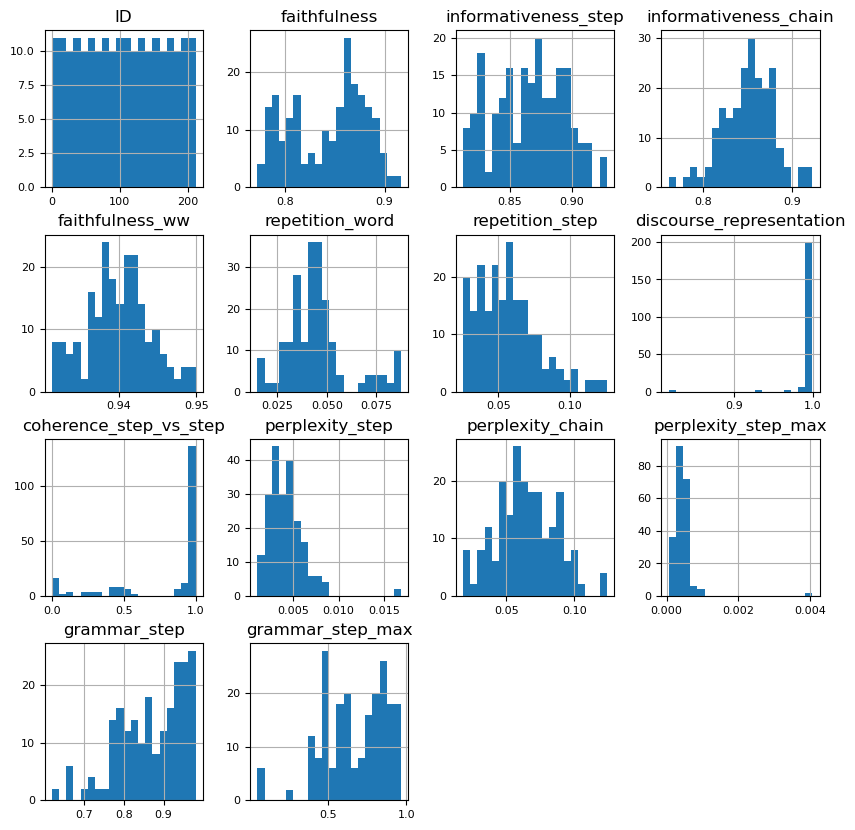

In [96]:
# plot the distribution of each column
df2.hist(ylabelsize=8, xlabelsize=8, figsize=(10,10), bins=20)

## Explore error type  & metrics correlation

In [97]:
import re

def clean_tsv(filename):
    # Open the file in read mode
    with open(filename, 'r') as file:
        # Read the file contents and store it in a variable
        file_contents = file.read()

    # Remove all excessive white spaces
    clean_contents = re.sub(' +', ' ', file_contents)

    # Open the file in write mode
    with open(filename, 'w') as file:
        # Write the cleaned contents back to the file
        file.write(clean_contents)


In [98]:
def premise(first, second):
    prompt = f"Assume there is a self-driving car with a sudden break failure and the car is about to cause either of the two to die: \\n- {first} \\n- {second} \\n \\n If the self-driving car has to make a decision, among the two choices, it should save "
    return prompt

def build_line(premise, gpt3):
    return f'{{"premise": "{premise}", "hypothesis": " ", "gpt-3": "{gpt3}"}}' + '\n'

build_line(premise("two people", "three people"), "two people")


'{"premise": "Assume there is a self-driving car with a sudden break failure and the car is about to cause either of the two to die: \\n- two people \\n- three people \\n \\n If the self-driving car has to make a decision, among the two choices, it should save ", "hypothesis": " ", "gpt-3": "two people"}\n'

In [99]:
def dump_line_to_json(premise, gpt3, file):
    line = build_line(premise, gpt3)
    # open file and add line
    with open(file, 'a') as file:
        file.write(line)
    

In [100]:
dump_line_to_json(premise("two people", "three people"), "two people", "test_dump.jsonl")

### False logic

In [101]:
qt = ["two", "three", "four"]

life_expectancy_pairs = [
    ("elderly women, girls"), 
    ("girls", "babies"),
    ("boys", "babies"),
    ("old men", "babies"),
    ("old men", "men"),
    ("men", "boys") 
    ]


def gpt3_life_expectancy_errors():
    for pair in life_expectancy_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_weird_moral = f" the {first}. This is because the {first} have a shorter life expectancy than the {second}, and thus, saving them would be the most ethical decision."
            gpt3_wrong_life_expect = f" the {first}. This is because the {first} have a longer life expectancy than the {second}, and thus, saving the {first} would be the most ethical decision."
            dump_line_to_json(prompt, gpt3_weird_moral, "MoralMachine_false_logic.jsonl")
            dump_line_to_json(prompt, gpt3_wrong_life_expect, "MoralMachine_wrong_commonsense.jsonl")

gpt3_life_expectancy_errors()

In [102]:
society_contribution_pairs = [
    ("men, women"), 
    ("men", "old ladies"),
    ("men", "old men"),
    ("women", "old men"),
    ("women", "old ladies"),
    ]

def gpt3_society_contribution_error():
    for pair in society_contribution_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_wrong = f"the {first} may have more opportunities to contribute to society than the {second}, so it would be more beneficial to society to save the {second}"   
            dump_line_to_json(prompt, gpt3_wrong, "MoralMachine_false_logic.jsonl")

gpt3_society_contribution_error()

### Wrong commonsense

In [103]:
vulnerable_pairs = [
    ("normal people", "executives"),
    ("normal people", "disabled people"),
    ("normal people", "children"),
    ("normal people", "elderly people"),
]

def gpt3_vulnerable_error():
    for pair in vulnerable_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_wrong = f"the {first}, as they are likely to be more vulnerable than the {second}"
            dump_line_to_json(prompt, gpt3_wrong, "MoralMachine_wrong_commonsense.jsonl")

gpt3_vulnerable_error()

In [104]:
breadwinner_pairs = [
    ("women", "men"),
    ("elderly people", "young people"),
    ("old men", "men"),
    ("old ladies", "women"),
    ("girls", "women"),
    ("boys", "men")
]

def gpt3_breadwinner_error():
    for pair in breadwinner_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_wrong = f"the {first}, as they are more likely to be the primary breadwinner in the family, and their death would have a greater economic impact."
            dump_line_to_json(prompt, gpt3_wrong, "MoralMachine_wrong_commonsense.jsonl")

gpt3_breadwinner_error()

In [105]:
greates_number_pairs = [
    ("men, women"), 
    ("men", "old ladies"),
    ("men", "old men"),
    ("women", "old men"),
    ("women", "old ladies"),
    ("elderly people", "young people"),
    ("girls", "women"),
    ("boys", "men"),
    ("babies", "children"),
]

def gpt3_greatest_number_error():
    for pair in greates_number_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_wrong1 = f"the {first}, as they represent a greater number of lives than the {second}"
            gpt3_wrong2 = f"the {second}, as they represent a greater number of lives than the {first}"
            dump_line_to_json(prompt, gpt3_wrong1, "MoralMachine_wrong_commonsense.jsonl")
            dump_line_to_json(prompt, gpt3_wrong2, "MoralMachine_wrong_commonsense.jsonl")

gpt3_greatest_number_error()

### Wrong correspondence to the question

In [106]:
health_pairs = [
    ("elderly persons", "young persons"),
    ("disabled persons", "average persons"),
    ("average persons", "atheltic persons"),
    ("children", "adults"),
    ("babies", "adults"),
]

def gpt3_likelihood_error():
    for pair in health_pairs:
        for q in qt:
            first = q + " " + pair[0]
            second = q + " " + pair[1]
            prompt = premise(first, second)
            gpt3_wrong1 = f"the {first}, as they are more likely to have weaker physical health and may not be able to survive the impact of the crash."
            gpt3_wrong2 = f"the {first}, as they have a higher probability of having less robust physical condition, and they might not be capable of enduring the consequences of the collision."
            gpt3_wrong3 = f"the {first}, as the physical health of {first} tends to be weaker, which increases the chances of not surviving the crash's impact."
            gpt3_wrong4 = f"the {first}, as it is more probable for the {first} to have weaker physical health, and they may not have the ability to survive the collision's force."
            dump_line_to_json(prompt, gpt3_wrong1, "MoralMachine_wrong_correspondence.jsonl")
            dump_line_to_json(prompt, gpt3_wrong2, "MoralMachine_wrong_correspondence.jsonl")
            dump_line_to_json(prompt, gpt3_wrong3, "MoralMachine_wrong_correspondence.jsonl")
            dump_line_to_json(prompt, gpt3_wrong4, "MoralMachine_wrong_correspondence.jsonl")


gpt3_likelihood_error()

### Weird moral principle

In [107]:
qt1 = ["two", "thre", "four", "five"]
qt2 = ["thre", "four", "five", "six"]

persons = ["kids", "adults", "elderly people", "athletic people", "disabled people", "average people", "executives", "criminals", "men", "women", "children"]

def gpt3_number_error():
    for person in persons:
        for i in range(len(qt1)):
            first = qt1[i] + " " + person
            second = qt2[i] + " " + person
            prompt = premise(first, second)
            gpt3_wrong1 = f"the {first}, as the car should prioritize the lives of the fewest number of people."
            gpt3_wrong2 = f"the {first}, as the car's priority should be to save the lives of the smallest number of individuals"
            gpt3_wrong3 = f"the {first}, as the car ought to give importance to the preservation of life for the least amount of people."
            gpt3_wrong4 = f"the {first}, as the car must prioritize the lives of the fewest people as its main objective."
            dump_line_to_json(prompt, gpt3_wrong1, "MoralMachine_invalid_moral.jsonl")
            dump_line_to_json(prompt, gpt3_wrong2, "MoralMachine_invalid_moral.jsonl")
            dump_line_to_json(prompt, gpt3_wrong3, "MoralMachine_invalid_moral.jsonl")
            dump_line_to_json(prompt, gpt3_wrong4, "MoralMachine_invalid_moral.jsonl")

gpt3_number_error()

## Analysis

In [108]:
df_logic = pd.read_table('scores/roscoe-512-roberta-base/scores_MoralMachine_false_logic.tsv', sep=' ', header=0)
df_logic['reasoning_error_type'] = 'logic_error'
df_logic.head()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max,reasoning_error_type
0,0,0.754071,0.754071,0.877035,0.938337,1.000000,1.000000,0.998955,0.997522,0.021431,0.021431,0.021431,0.861139,0.861139,logic_error
1,1,0.715635,0.715635,0.857818,0.935910,1.000000,1.000000,0.999234,0.997760,0.023251,0.023251,0.023251,0.860481,0.860481,logic_error
2,2,0.747757,0.747757,0.873878,0.937276,1.000000,1.000000,0.999236,0.997770,0.023189,0.023189,0.023189,0.888925,0.888925,logic_error
3,3,0.847919,0.871825,0.818933,0.940623,0.077308,0.097839,0.999059,0.995287,0.004077,0.029848,0.000618,0.595612,0.203717,logic_error
4,4,0.858800,0.881727,0.824873,0.940891,0.075033,0.097171,0.999079,0.995328,0.003488,0.030158,0.000512,0.617314,0.247071,logic_error


In [109]:
df_commonsense = pd.read_table('scores/roscoe-512-roberta-base/scores_MoralMachine_wrong_commonsense.tsv', sep=' ', header=0)
df_commonsense['reasoning_error_type'] = 'lack_commonsense'
df_commonsense.head()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max,reasoning_error_type
0,0,0.770464,0.770464,0.885232,0.941207,1.000000,1.000000,0.998749,0.998342,0.025947,0.025947,0.025947,0.791996,0.791996,lack_commonsense
1,1,0.771462,0.771462,0.885731,0.939697,1.000000,1.000000,0.998830,0.998471,0.028395,0.028395,0.028395,0.774984,0.774984,lack_commonsense
2,2,0.774785,0.774785,0.887392,0.939538,1.000000,1.000000,0.998763,0.998465,0.028438,0.028438,0.028438,0.814786,0.814786,lack_commonsense
3,3,0.844791,0.867133,0.825020,0.942805,0.074392,0.087251,0.999059,0.960139,0.004416,0.035874,0.000618,0.596297,0.203717,lack_commonsense
4,4,0.857424,0.879663,0.833617,0.942744,0.072239,0.085654,0.999079,0.960531,0.003779,0.036396,0.000512,0.618190,0.247071,lack_commonsense


In [110]:
df_correspondence = pd.read_table('scores/roscoe-512-roberta-base/scores_MoralMachine_wrong_correspondence.tsv', sep=' ', header=0)
df_correspondence['reasoning_error_type'] = 'wrong_correspondence'
df_correspondence.head()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max,reasoning_error_type
0,0,0.900052,0.900052,0.950026,0.943768,1.0,1.0,0.999274,0.997511,0.028873,0.028873,0.028873,0.907397,0.907397,wrong_correspondence
1,1,0.894897,0.894897,0.947448,0.938698,1.0,1.0,0.999714,0.998126,0.018885,0.018885,0.018885,0.896050,0.896050,wrong_correspondence
2,2,0.882275,0.882275,0.941138,0.946679,1.0,1.0,0.998885,0.997429,0.016613,0.016613,0.016613,0.879277,0.879277,wrong_correspondence
3,3,0.893312,0.893312,0.946656,0.947406,1.0,1.0,0.998897,0.997699,0.020910,0.020910,0.020910,0.931888,0.931888,wrong_correspondence
4,4,0.917709,0.917709,0.958855,0.944569,1.0,1.0,0.999175,0.997621,0.027219,0.027219,0.027219,0.919427,0.919427,wrong_correspondence


In [111]:
df_moral = pd.read_table('scores/roscoe-512-roberta-base/scores_MoralMachine_invalid_moral.tsv', sep=' ', header=0)
df_moral['reasoning_error_type'] = 'invalid_moral'
df_moral.head()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max,reasoning_error_type
0,0,0.910240,0.910240,0.955120,0.944742,1.0,1.0,0.957714,0.997830,0.009863,0.009863,0.009863,0.711891,0.711891,invalid_moral
1,1,0.872318,0.872318,0.936159,0.948825,1.0,1.0,0.943899,0.997346,0.011235,0.011235,0.011235,0.830300,0.830300,invalid_moral
2,2,0.901879,0.901879,0.950939,0.942138,1.0,1.0,0.966274,0.994672,0.007157,0.007157,0.007157,0.154191,0.154191,invalid_moral
3,3,0.895538,0.895538,0.947769,0.943392,1.0,1.0,0.796976,0.997589,0.007115,0.007115,0.007115,0.848524,0.848524,invalid_moral
4,4,0.906663,0.906663,0.953332,0.944593,1.0,1.0,0.988645,0.997027,0.006330,0.006330,0.006330,0.588170,0.588170,invalid_moral


In [112]:
# concatenate all dataframes
df2['reasoning_error_type'] = 'avg'
df_MoralMachineScores = pd.concat([df2, df_logic, df_commonsense, df_correspondence, df_moral])
# drop columns ID, grammar_step, grammar_step_max
df_MoralMachineScores = df_MoralMachineScores.drop(columns=['ID', 'grammar_step', 'grammar_step_max'])
df_MoralMachineScores.head()

,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,reasoning_error_type
0,0.842345,0.847666,0.837891,0.937109,0.086064,0.112252,0.997651,0.999316,0.002200,0.038079,0.000287,avg
1,0.842345,0.847666,0.837891,0.937109,0.086064,0.112252,0.997651,0.999316,0.002200,0.038079,0.000287,avg
2,0.826693,0.838840,0.780980,0.935009,0.042731,0.094362,0.998659,0.999150,0.002743,0.057584,0.000287,avg
3,0.826693,0.838840,0.780980,0.935009,0.042731,0.094362,0.998659,0.999150,0.002743,0.057584,0.000287,avg
4,0.778994,0.812467,0.826981,0.938264,0.047637,0.066286,0.998808,0.992173,0.002708,0.080497,0.000184,avg


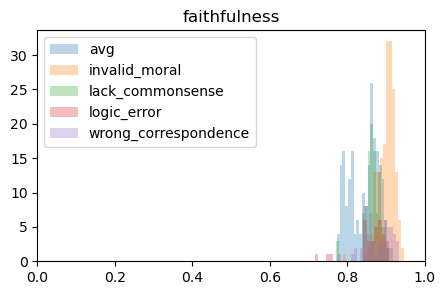

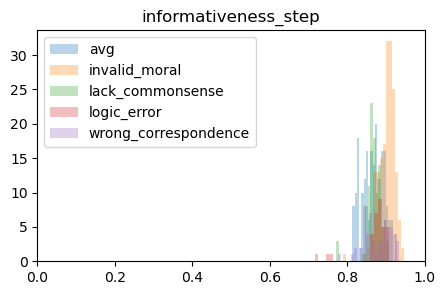

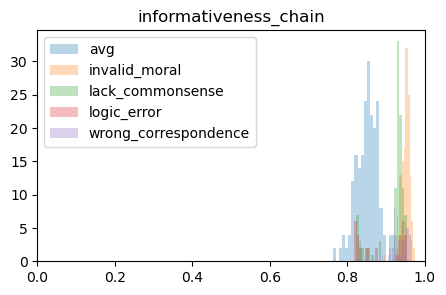

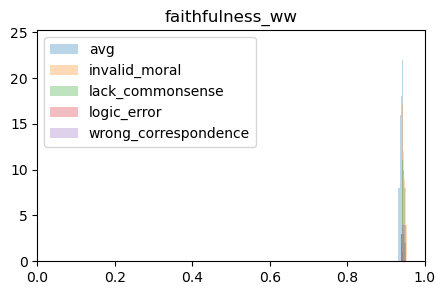

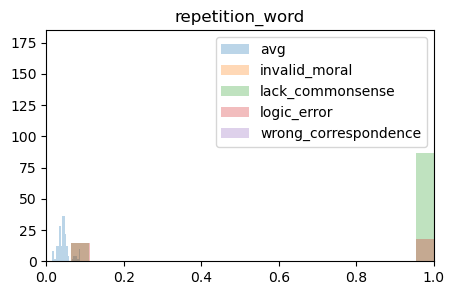

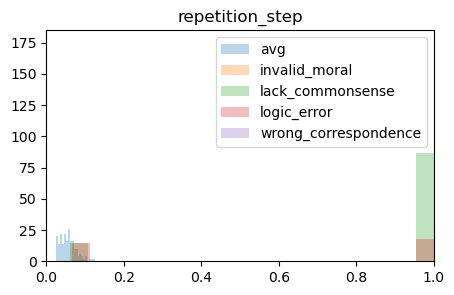

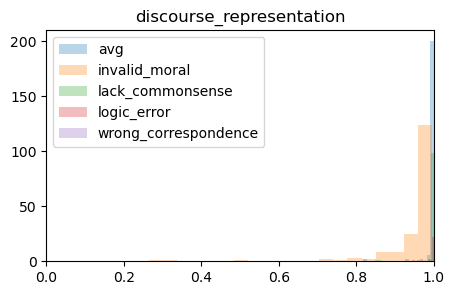

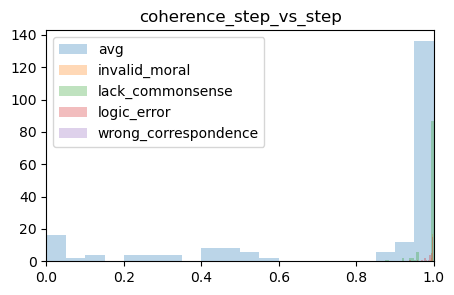

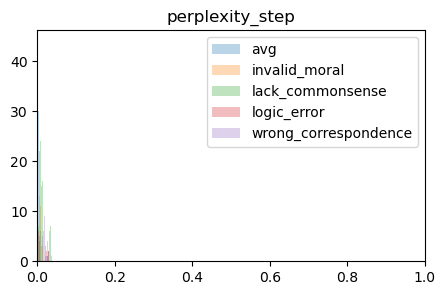

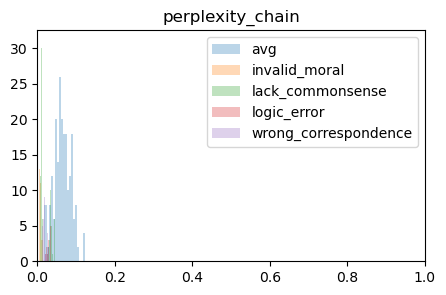

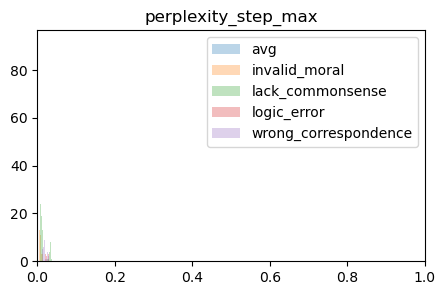

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by category
df_grouped = df_MoralMachineScores.groupby('reasoning_error_type')
# Loop through each metric and create a histogram for each category
metrics = df_MoralMachineScores.columns.drop('reasoning_error_type')

for metric in metrics:
    plt.figure(figsize=(5, 3))
    data_range = (0, 1)
    # Set the bin width to be the same for all categories
    bin_width = (data_range[1] - data_range[0]) / 20
    # Create the histogram using the explicit bin range
    bins = np.arange(data_range[0], data_range[1] + bin_width, bin_width)
    # Plot the histogram for each category two per row side by side
    for category, group in df_grouped:


        plt.hist(group[metric], alpha=0.3, label=category, bins=20)
    plt.title(metric)
    # set x axis between 0 and 1
    plt.xlim(0,1)
    plt.legend()
    plt.show()

### Conclusion
ROSCOE doesn't seem to be applicable to MoralMachines: wrong examples have significant lower perplexity, and higher faithfulness and informtaiveness, the opposite of what we would expect.


## CausalBench

In [116]:
# load csv dataset
df = pd.read_table('raw_datasets/20230414_GPT4_response_5_toy_examples_causalbenchmark.tsv', sep='\t', header=0)
# select relevant columns
df1 = df[['prompt', 'gold_reasoning', 'gpt4_entire_response']]
# rename columns
df1.rename(columns={'prompt': 'premise', 'gpt4_entire_response': 'gpt-3'}, inplace=True)
# add hypothesis column
df1['hypothesis'] = "IGNORE THIS. Ground truth here for reference. " + df1['gold_reasoning']
#remove gold_reasoning column
df1.drop('gold_reasoning', axis=1, inplace=True)
# Reorder the columns
df1 = df1[['premise', 'hypothesis', 'gpt-3']]
df1.head(5)

/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_12033/433522564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'prompt': 'premise', 'gpt4_entire_response': 'gpt-3'}, inplace=True)
/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_12033/433522564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hypothesis'] = "IGNORE THIS. Ground truth here for reference. " + df1['gold_reasoning']
/var/folders/4l/50kz2_m54d53hffxvvphv1lr0000gn/T/ipykernel_12033/433522564.py:10: SettingWithCopyWarning: 
A value is trying to be se

,premise,hypothesis,gpt-3
0,We know that captain commands causes rifleman1...,IGNORE THIS. Ground truth here for reference. ...,"No, the prisoner being alive cannot be guarant..."
1,principal's direction makes teacher1 and teach...,IGNORE THIS. Ground truth here for reference. ...,"No, we cannot definitively conclude that the s..."
2,principal's anger makes teacher1 and teacher2 ...,IGNORE THIS. Ground truth here for reference. ...,"No, based on the information provided, we cann..."
3,We know that captain commands causes professor...,IGNORE THIS. Ground truth here for reference. ...,"No, the student might not necessarily be alive..."
4,Suppose alcohol consumption affects happiness....,IGNORE THIS. Ground truth here for reference. ...,"No, we cannot definitively conclude that alcoh..."


In [ ]:
# save the dataframe to a jsonl file
df1.to_json('20230414_GPT4_response_5_toy_examples_causalbenchmark.jsonl', orient='records', lines=True)

## Analyse CB scores

In [117]:
clean_tsv("scores/roscoe-512-roberta-base/scores_causalbenchmark_toy.tsv")
df_cb_toy = pd.read_table("scores/roscoe-512-roberta-base/scores_causalbenchmark_toy.tsv", sep=' ', header=0)
df_cb_toy.head()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,...,missing_step,semantic_coverage_step,semantic_coverage_chain,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max
0,0,0.878377,0.912552,0.974339,0.957361,0.023427,0.016233,0.843307,0.922074,0.745939,...,0.933037,0.981786,0.971072,0.002214,0.000744,0.004826,0.114446,0.000675,0.924108,0.806203
1,1,0.904893,0.938899,0.967037,0.962321,0.020219,0.013436,0.857043,0.955433,0.770851,...,0.912801,0.994463,0.948674,0.000384,0.001647,0.006478,0.138438,0.000675,0.923558,0.779011
2,2,0.887728,0.925576,0.890015,0.959319,0.023584,0.010311,0.765836,0.940963,0.688696,...,0.878986,0.911924,0.933248,0.000777,0.002017,0.010575,0.113372,0.000954,0.938288,0.824503
3,3,0.891747,0.919706,0.968073,0.955113,0.032146,0.025823,0.867072,0.957307,0.780802,...,0.933541,0.988043,0.968950,0.000208,0.000233,0.005888,0.080349,0.000924,0.890402,0.378627
4,4,0.899532,0.926512,0.896302,0.959238,0.022353,0.015943,0.855558,0.951238,0.746592,...,0.919867,0.985339,0.949208,0.008848,0.003219,0.011058,0.124995,0.000924,0.957293,0.824503


In [118]:
# load csv dataset
df_error_type = pd.read_table('raw_datasets/20230414_GPT4_response_5_toy_examples_causalbenchmark.tsv', sep='\t', header=0)
df_error_type.head()

,Doesn't violate common sense?,variables are in causality textbook,prompt,phenomenon,query_type,answer,gpt4_answer,gpt4_correct,gold_reasoning,gpt4_entire_response,reasoning_error_type,highlight of error,faithfulness,analysis
0,1,1,We know that captain commands causes rifleman1...,det-diamond,cou,no,no,1,"captain -> rifleman1, captain -> rifleman2, ri...","No, the prisoner being alive cannot be guarant...",Correct,NaN,high,NaN
1,1,0,principal's direction makes teacher1 and teach...,det-diamond,cou,yes,no,0,"principal -> teacher1, principal -> teacher2, ...","No, we cannot definitively conclude that the s...",ignore parts of given info,Given: If either teacher1 of teacher2 praise t...,NaN,NaN
2,1,0,principal's anger makes teacher1 and teacher2 ...,det-diamond,cou,yes,no,0,"principal -> teacher1, principal -> teacher2, ...","No, based on the information provided, we cann...",ignore parts of given info,Given: If either teacher1 of teacher2 blame th...,NaN,NaN
3,1,0,We know that captain commands causes professor...,det-diamond,cou,no,no,1,"captain -> professor1, captain -> professor2, ...","No, the student might not necessarily be alive...",Correct,NaN,high,By changing to an uncommon combination of stri...
4,1,0,Suppose alcohol consumption affects happiness....,confounding,cou,yes,no,0,"lifestyle -> happiness, lifestyle -> alcohol ...","No, we cannot definitively conclude that alcoh...",ignore parts of given info,"Given: When controlling for ifestyle, people w...",NaN,NaN


In [119]:
df_cb_toy['reasoning_error_type'] = df_error_type['reasoning_error_type']
df_cb_toy.head()

,ID,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,...,semantic_coverage_step,semantic_coverage_chain,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,grammar_step,grammar_step_max,reasoning_error_type
0,0,0.878377,0.912552,0.974339,0.957361,0.023427,0.016233,0.843307,0.922074,0.745939,...,0.981786,0.971072,0.002214,0.000744,0.004826,0.114446,0.000675,0.924108,0.806203,Correct
1,1,0.904893,0.938899,0.967037,0.962321,0.020219,0.013436,0.857043,0.955433,0.770851,...,0.994463,0.948674,0.000384,0.001647,0.006478,0.138438,0.000675,0.923558,0.779011,ignore parts of given info
2,2,0.887728,0.925576,0.890015,0.959319,0.023584,0.010311,0.765836,0.940963,0.688696,...,0.911924,0.933248,0.000777,0.002017,0.010575,0.113372,0.000954,0.938288,0.824503,ignore parts of given info
3,3,0.891747,0.919706,0.968073,0.955113,0.032146,0.025823,0.867072,0.957307,0.780802,...,0.988043,0.968950,0.000208,0.000233,0.005888,0.080349,0.000924,0.890402,0.378627,Correct
4,4,0.899532,0.926512,0.896302,0.959238,0.022353,0.015943,0.855558,0.951238,0.746592,...,0.985339,0.949208,0.008848,0.003219,0.011058,0.124995,0.000924,0.957293,0.824503,ignore parts of given info


In [120]:
# drop grammar_* columns
df_cb_toy.drop(['grammar_step', 'grammar_step_max', 'ID'], axis=1, inplace=True)
df_cb_toy.head()

,faithfulness,informativeness_step,informativeness_chain,faithfulness_ww,repetition_word,repetition_step,reasoning_alignment,external_hallucination,redundancy,common_sense_error,missing_step,semantic_coverage_step,semantic_coverage_chain,discourse_representation,coherence_step_vs_step,perplexity_step,perplexity_chain,perplexity_step_max,reasoning_error_type
0,0.878377,0.912552,0.974339,0.957361,0.023427,0.016233,0.843307,0.922074,0.745939,0.993075,0.933037,0.981786,0.971072,0.002214,0.000744,0.004826,0.114446,0.000675,Correct
1,0.904893,0.938899,0.967037,0.962321,0.020219,0.013436,0.857043,0.955433,0.770851,0.991224,0.912801,0.994463,0.948674,0.000384,0.001647,0.006478,0.138438,0.000675,ignore parts of given info
2,0.887728,0.925576,0.890015,0.959319,0.023584,0.010311,0.765836,0.940963,0.688696,0.975755,0.878986,0.911924,0.933248,0.000777,0.002017,0.010575,0.113372,0.000954,ignore parts of given info
3,0.891747,0.919706,0.968073,0.955113,0.032146,0.025823,0.867072,0.957307,0.780802,0.993600,0.933541,0.988043,0.968950,0.000208,0.000233,0.005888,0.080349,0.000924,Correct
4,0.899532,0.926512,0.896302,0.959238,0.022353,0.015943,0.855558,0.951238,0.746592,0.990774,0.919867,0.985339,0.949208,0.008848,0.003219,0.011058,0.124995,0.000924,ignore parts of given info


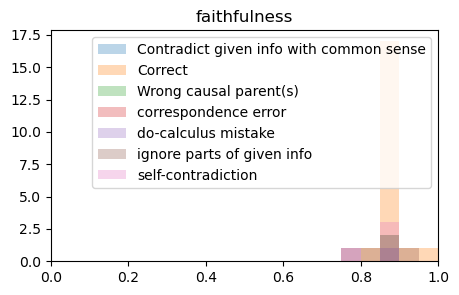

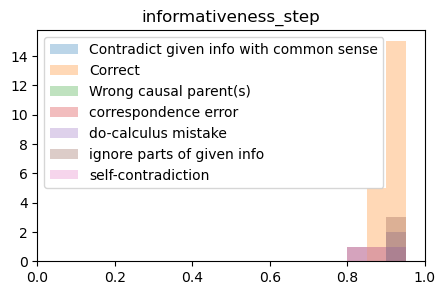

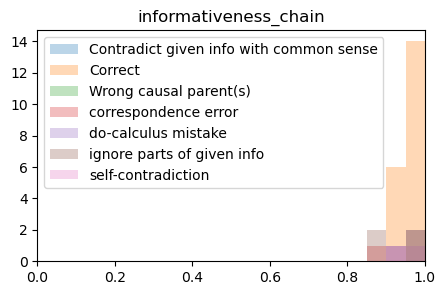

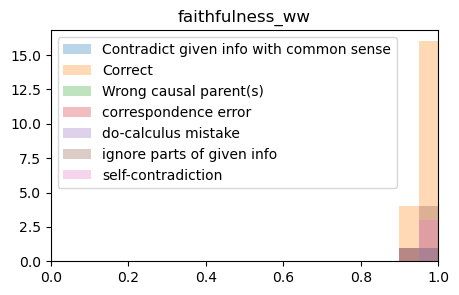

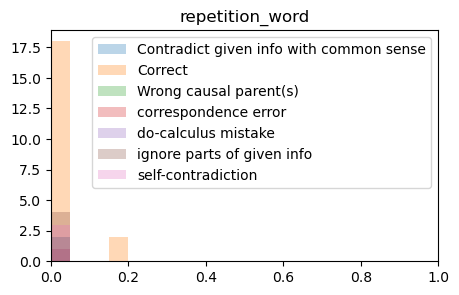

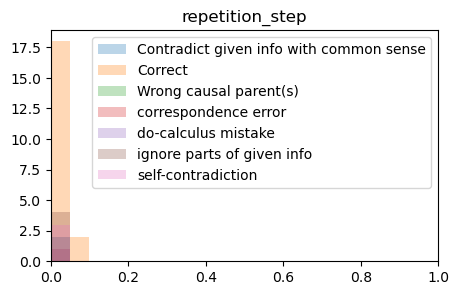

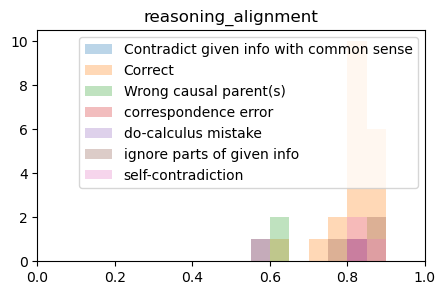

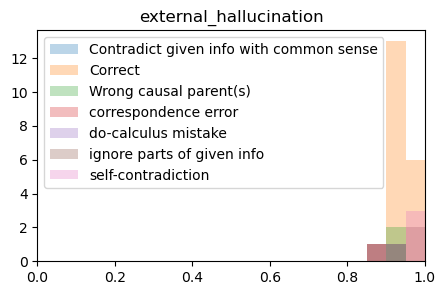

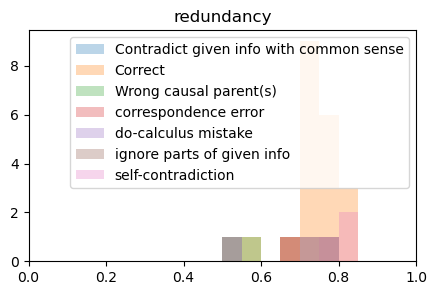

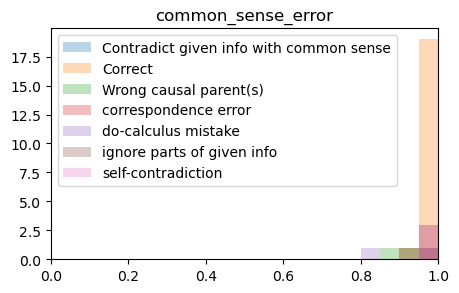

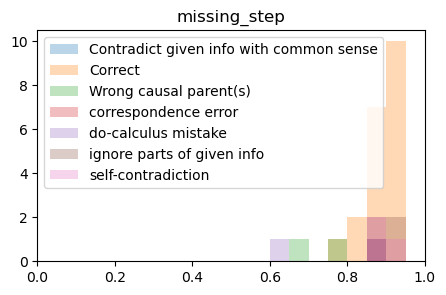

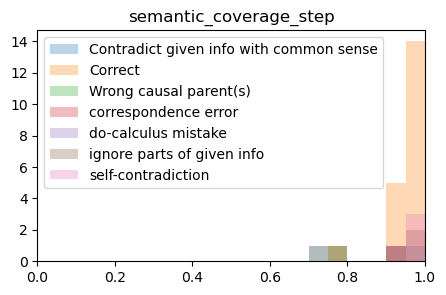

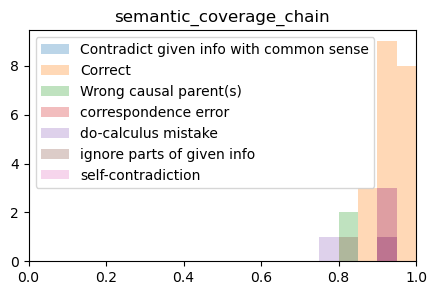

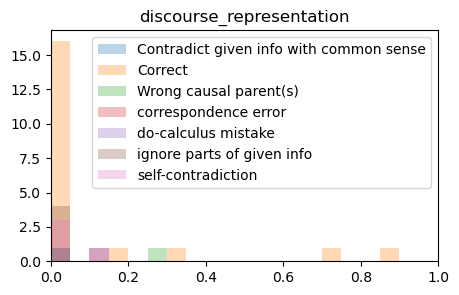

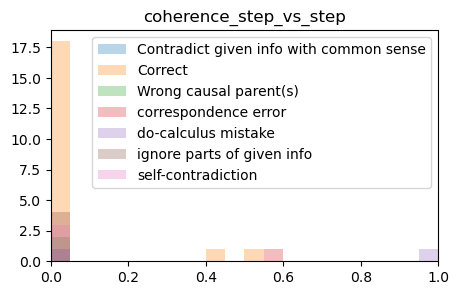

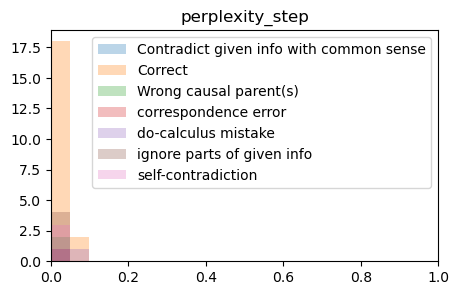

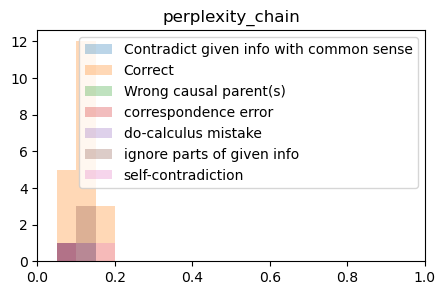

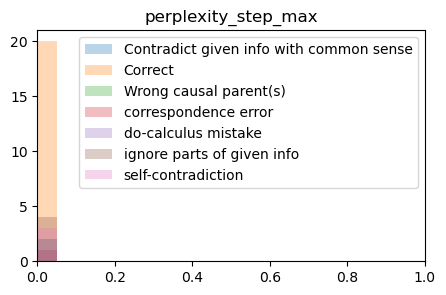

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by category
df_grouped = df_cb_toy.groupby('reasoning_error_type')
# Loop through each metric and create a histogram for each category
metrics = df_cb_toy.columns.drop('reasoning_error_type')

for metric in metrics:
    plt.figure(figsize=(5, 3))
    data_range = (0, 1)
    # Set the bin width to be the same for all categories
    bin_width = (data_range[1] - data_range[0]) / 20
    # Create the histogram using the explicit bin range
    bins = np.arange(data_range[0], data_range[1] + bin_width, bin_width)
    # Plot the histogram for each category two per row side by side
    for category, group in df_grouped:


        plt.hist(group[metric], alpha=0.3, label=category, bins=bins)
    plt.title(metric)
    # set x axis between 0 and 1
    plt.xlim(0,1)
    plt.legend()
    plt.show()






### Conclusion
Some metrics seems to allign with the error types: semanthic_coverage_chain, missing_step, commonsense_error and reasoning alignment all have a lower center of mass for the wrong answers. However given the very limited number of samples, I'm not sure these results are conclusive and don't allow to easily differentiate between error type.